# Assignment 5 - Text Classification Evaluation Answer Key

In [1]:
import nltk
from nltk.text import Text
from nltk import word_tokenize, sent_tokenize
import pandas as pd

## Question 1: Load into DataFrames and Assigning Class Labels

In [2]:
en_text = pd.read_csv('../data/CONcreTEXT_trial_EN.tsv',sep='\t')
it_text = pd.read_csv('../data/CONcreTEXT_trial_IT.tsv',sep='\t')

In [3]:
df = pd.concat([en_text,it_text])

In [4]:
df.head()

,TARGET,POS,INDEX,TEXT,MEAN
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06
1,achievement,N,9,"Please list people you have helped , your pers...",3.03
2,activate,V,1,Add activated carbon straight to your vodka .,3.83
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51
4,adventure,N,9,Look for a partner that shares your level of a...,2.03


In [5]:
df['CONCRETE'] = df.apply(lambda x: 'HIGH' if x['MEAN'] >= 4 else 'LOW',axis = 1 )
df.head()

,TARGET,POS,INDEX,TEXT,MEAN,CONCRETE
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06,LOW
1,achievement,N,9,"Please list people you have helped , your pers...",3.03,LOW
2,activate,V,1,Add activated carbon straight to your vodka .,3.83,LOW
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51,HIGH
4,adventure,N,9,Look for a partner that shares your level of a...,2.03,LOW


In [6]:
df['CONCRETE'].value_counts()

HIGH    121
LOW      79
Name: CONCRETE, dtype: int64

In [7]:
#alternative 
import numpy as np
df['CONCRETE_numpy'] = np.where(df['MEAN'] >= 4,'HIGH','LOW')
df.head()

,TARGET,POS,INDEX,TEXT,MEAN,CONCRETE,CONCRETE_numpy
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06,LOW,LOW
1,achievement,N,9,"Please list people you have helped , your pers...",3.03,LOW,LOW
2,activate,V,1,Add activated carbon straight to your vodka .,3.83,LOW,LOW
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51,HIGH,HIGH
4,adventure,N,9,Look for a partner that shares your level of a...,2.03,LOW,LOW


In [8]:
df['CONCRETE_numpy'].value_counts()
# It's the same thing!

HIGH    121
LOW      79
Name: CONCRETE_numpy, dtype: int64

In [9]:
print(u'Dataframe shape: {}'.format(df.shape))
df[df['CONCRETE_numpy'] == df['CONCRETE']].shape 
# Dataframe shape where all numpy == concrete helps us to confirm 
#that both columns are the same thing

Dataframe shape: (200, 7)


(200, 7)

In [10]:
# now we can remove the numpy one
df.drop(['CONCRETE_numpy'],axis =1,inplace = True)
df.head()

,TARGET,POS,INDEX,TEXT,MEAN,CONCRETE
0,achievement,N,3,"Bring up academic achievements , awards , and ...",3.06,LOW
1,achievement,N,9,"Please list people you have helped , your pers...",3.03,LOW
2,activate,V,1,Add activated carbon straight to your vodka .,3.83,LOW
3,activate,V,15,"Place sensors around your garden , and when a ...",5.51,HIGH
4,adventure,N,9,Look for a partner that shares your level of a...,2.03,LOW


## Question 2: Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size = 0.2, random_state = 1)

In [12]:
train_df.shape

(160, 6)

In [13]:
test_df.shape

(40, 6)

## Question 3: Majority Class Baseline

**Note** - Classification results may vary depending on random_state (how the dataset is shuffled). So variation in metrics is okay.

In [14]:
test_df.head()

,TARGET,POS,INDEX,TEXT,MEAN,CONCRETE
58,interest,N,7,a loan with annual interest adds the interest ...,4.06,HIGH
40,flirt,V,3,Do n't just flirt over text or send her Facebo...,3.57,LOW
34,eat,V,0,eat snacks whenever you 're hungry and do n't ...,6.51,HIGH
2,amore,N,5,"Pensa ai tuoi sentimenti di amore , passione e...",2.71,LOW
84,spirito,N,9,Mentre alcuni avvocati rifiuteranno l' offerta...,1.78,LOW


In [15]:
# Pick highest occuring label
from sklearn.dummy import DummyClassifier
baseline_1 = DummyClassifier(strategy = 'most_frequent')
baseline_1.fit(train_df['TEXT'],train_df['CONCRETE'])
baseline_1_predictions = baseline_1.predict(test_df['TEXT'])
baseline_1_predictions

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH'],
      dtype='<U4')

In [16]:
from sklearn.metrics import *
print(classification_report(test_df['CONCRETE'],baseline_1_predictions))

              precision    recall  f1-score   support

        HIGH       0.57      1.00      0.73        23
         LOW       0.00      0.00      0.00        17

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40



C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import matplotlib.pyplot as plt
plot_confusion_matrix(baseline_1,test_df['TEXT'],test_df['CONCRETE'],cmap=plt.cm.Blues)

## Question 4: Target Length Baseline
Object oriented with inheritance is one way to do it - it makes things pretty concise.

In [18]:
class TargetLengthBaseline (DummyClassifier):
    def __init__(self,threshold = 5):
        super().__init__()
        self.threshold = threshold
    def predict(self,X):
        predictions = []
        for x in X:
            if len(x) >= self.threshold:
                predictions.append('HIGH')
            else:
                predictions.append('LOW')
        return np.array(predictions)

baseline_2 = TargetLengthBaseline(threshold = 5)
baseline_2.fit(train_df['TARGET'],train_df['CONCRETE'])
baseline_2_predictions = baseline_2.predict(test_df['TARGET'])
baseline_2_predictions

/Users/ealhossa/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


array(['HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'LOW', 'LOW', 'LOW', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH',
       'LOW', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH'],
      dtype='<U4')

In [49]:
# This is an alternative
def target_predict(X,threshold = 5):
    predictions = []
    for x in X:
        if len(x) >= threshold:
            predictions.append('HIGH')
        else:
            predictions.append('LOW')
    return np.array(predictions)

baseline_2_predictions = target_predict(train_df['TARGET'],threshold = 5)

baseline_2_predictions = baseline_2.predict(test_df['TARGET'])
baseline_2_predictions

array(['HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'LOW', 'LOW', 'LOW', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH',
       'LOW', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH'],
      dtype='<U4')

In [50]:
print(classification_report(test_df['CONCRETE'],baseline_2_predictions))

              precision    recall  f1-score   support

        HIGH       0.53      0.70      0.60        23
         LOW       0.30      0.18      0.22        17

    accuracy                           0.48        40
   macro avg       0.42      0.44      0.41        40
weighted avg       0.43      0.47      0.44        40



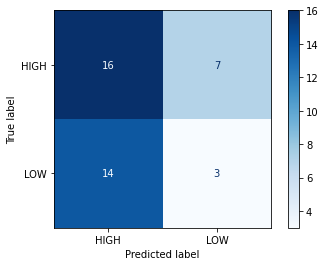

In [20]:
plot_confusion_matrix(baseline_2,test_df['TARGET'],test_df['CONCRETE'],cmap=plt.cm.Blues)

## Question 5: Naive Bayes

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB as nb

In [22]:
cv = CountVectorizer()
X_counts = cv.fit_transform(train_df['TEXT'])
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_counts)
y_train = train_df['CONCRETE']

In [23]:
m = nb()
m = m.fit(X_tfidf,y_train)


In [24]:
X_test = cv.transform(test_df['TEXT'])
X_test = tfidf.transform(X_test)
nb_pred = m.predict(X_test)
nb_pred

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH'],
      dtype='<U4')

In [25]:
print(classification_report(test_df['CONCRETE'],nb_pred)) # not much improvement 

              precision    recall  f1-score   support

        HIGH       0.58      0.96      0.72        23
         LOW       0.50      0.06      0.11        17

    accuracy                           0.57        40
   macro avg       0.54      0.51      0.41        40
weighted avg       0.55      0.57      0.46        40



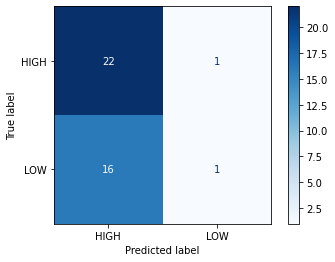

In [26]:
plot_confusion_matrix(m,X_test,test_df['CONCRETE'],cmap=plt.cm.Blues)

## Question 7: Experiment with 3 different thresholds
This question can be done in many different ways - I chose to attempt all thresholds from 1-12 and select the model with the best threshold and report on it.

In [41]:
longest_word = max(train_df['TARGET'].apply(lambda x: len(x)))

In [42]:
from sklearn.model_selection import GridSearchCV
params = {'threshold':[i for i in range(1,longest_word)]}

model = TargetLengthBaseline()
clf = GridSearchCV(model,params)
clf.fit(train_df['TARGET'],train_df['CONCRETE'])
sorted(clf.cv_results_.keys())

/Users/ealhossa/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_threshold',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [43]:
clf.cv_results_['mean_test_score']

array([0.6125 , 0.6125 , 0.6125 , 0.60625, 0.55   , 0.4625 , 0.45   ,
       0.4375 , 0.35   , 0.36875, 0.3375 ])

In [44]:
clf.best_estimator_

TargetLengthBaseline(threshold=1)

In [45]:
clf.best_estimator_.score(test_df['TARGET'],test_df['CONCRETE'])
# Using GridSearch for all possible threshold lengths 1-19 the 'best' is thresholds 1-3 on the training set using 5kfold
# Which is pretty much predicting everything as HIGH
#and it seems to yield 57.5% accuracy on the test set very close to the other models. 
# This indicates that TARGET length is a poor predictor of CONCRETENESS.

0.575

In [46]:
predictions = clf.best_estimator_.predict(test_df['TARGET'])
predictions

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH'],
      dtype='<U4')

In [47]:
print(classification_report(test_df['CONCRETE'],predictions)) # not much improvement 

              precision    recall  f1-score   support

        HIGH       0.57      1.00      0.73        23
         LOW       0.00      0.00      0.00        17

    accuracy                           0.57        40
   macro avg       0.29      0.50      0.37        40
weighted avg       0.33      0.57      0.42        40



/Users/ealhossa/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


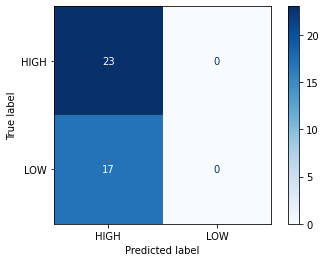

In [48]:
plot_confusion_matrix(clf.best_estimator_,test_df['TARGET'],test_df['CONCRETE'],cmap=plt.cm.Blues)